In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt
 
import torchvision
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

print(torch.__version__)
print(torchvision.__version__)

2.0.1
0.15.2


In [2]:
train_data=datasets.FashionMNIST(root='data',
                                 train=True,
                                 transform=ToTensor(),
                                download=True,
                                target_transform=None)
test_data=datasets.FashionMNIST(root='data',
                                 train=False,
                                 transform=ToTensor(),
                                download=True,
                                target_transform=None)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image,labels=train_data[0]  #Train data is a dataloader right which keeps (features,label)
                             # looped as tupple for every roes

In [5]:
image.shape,labels          # shape of input is CXHXW

(torch.Size([1, 28, 28]), 9)

In [6]:
train_data.class_to_idx # train_data. has many attributes 

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

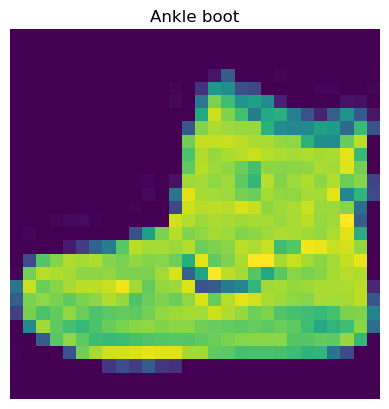

In [9]:
plt.imshow(image.squeeze())
plt.axis(False)
plt.title(class_names[labels])
plt.show()

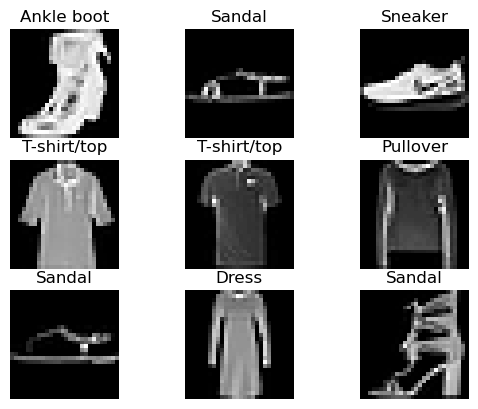

In [10]:
# torch.manual_seed(42)
def plt_gray(train_data=train_data,rows=3,cols=3):
    for i in range(1,(rows*cols)+1):
        ridx=torch.randint(0,high=len(train_data),size=[1]).item()
        plt.subplot(rows,cols,i)
        image,label=train_data[ridx]
        plt.imshow(image.squeeze(),cmap='gray')
        plt.title(class_names[label])
        plt.axis(False)
plt_gray()

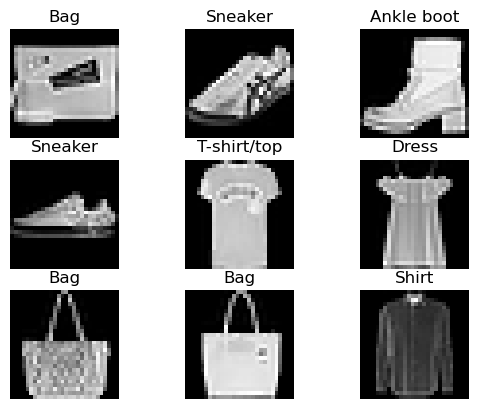

In [11]:
plt_gray(test_data)

In [12]:
# We can't send whole dataset atonce unlike previous why ?
#     1. Memory won't be sufficient
#     2. member our model adjust params every epoch since we have 10,000 classes inour epoch or 60k images need to be
# passed per epoch to our model to get params adjusted once !! so if we do 1000 epoch params adjust 1000 times but that
# cost us 60,000 * 1000 image passes  even then 1000 param changes

# How to overcome 
#     1. Pass in batches - 1 epoch = 1 batchsize= 1 time param changes in modle =32 (usually)

In [19]:
# For above reason we create batches with help of - dataloaders - collection of batches
BATCH_SIZE=32
train_data_loader=DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True
                            )
test_data_loader=DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                            )
len(train_data_loader)

1875

In [15]:
train_feature_batch,train_label_batch=next(iter(train_data_loader))
len(train_feature_batch),train_feature_batch.shape

(32, torch.Size([32, 1, 28, 28]))

In [16]:
len(train_data_loader)

1875

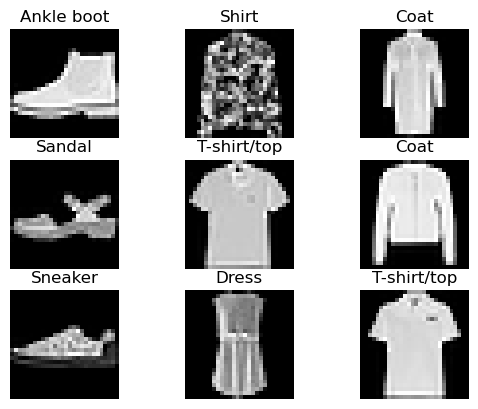

In [17]:
rows=3
cols=3
for i in range(1,(rows*cols)+1):
    ridx=torch.randint(0,high=len(train_feature_batch),size=[1]).item()
    plt.subplot(rows,cols,i)
    image,label=train_feature_batch[ridx],train_label_batch[ridx]
    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

### Model Building - Simple model

In [14]:
# Lets first understand the importance of Faltten Layer
single_image=train_feature_batch[0]
single_image.shape,len(single_image[0])

NameError: name 'train_feature_batch' is not defined

In [15]:
flatten_layer=nn.Flatten()
output=flatten_layer(single_image)
print(f'Before flattening shape - single image: {single_image.shape}')
print(f'After flattening shape - single image: {output.shape}')
print(f'After flattening shape - Batch: {flatten_layer(train_feature_batch).shape}')
# So it basically makes the cuboid in plate where seen xy palne is thread and xz-pane is colors

NameError: name 'single_image' is not defined

In [10]:
class FashionMNISTV0(nn.Module):
    def __init__(self,input_features=784,output_features=10,hidden_units=10):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_features)
        )
    def forward(self,x):
        return self.layer_stack(x)

model_0=FashionMNISTV0()
model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
check1=model_0(torch.rand([1,1,28,28]))
check1

tensor([[-0.2080, -0.3338, -0.1040,  0.0240,  0.1849,  0.1738, -0.2208,  0.3474,
          0.0280, -0.0855]], grad_fn=<AddmmBackward0>)

In [11]:
import requests 
from pathlib import Path

if Path('helper_functions.py').is_file():
    print('Already exists skipping download')
else:
    print('Downloading the helper functions')
    request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py','wb') as f:
        f.write(request.content)
print('Setup completed')

Already exists skipping download
Setup completed


In [12]:
from timeit import default_timer as timer
def time_fn(st,ent):
    return f'Total time: {(ent-st):.5f} Secs'
time_fn(timer(),timer())

'Total time: 0.00000 Secs'

In [14]:
from helper_functions import *
from tqdm.auto import tqdm

In [15]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters()
                         ,lr=0.1)

In [26]:
EPOCHS=3
st=timer()
torch.manual_seed(42)
for epoch in tqdm(range(EPOCHS)):
    print(f'EPOCH: {epoch}')
    train_loss=0
    for batch,(X,y) in enumerate(train_data_loader):
        model_0.train()
        y_pred=model_0(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if(batch%400==0):
            print(f'{batch*len(X)}/{len(train_data_loader.dataset)}')
    train_loss/=len(train_data_loader) # Average at each epo for overall batch size-> average batch loss

    #Testing
    test_loss,test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_data_loader:
            test_preds=model_0(X)
            test_loss+=loss_fn(test_preds,y)
            test_acc+=accuracy_fn(y,test_preds.argmax(dim=1))
        test_loss/=len(test_data_loader)
        test_acc/=len(test_data_loader)
    print(f'Train Loss: {train_loss} | Test Loss: {test_loss}, Accuracy: {test_acc}')
et=timer()
time_fn(st,et)

  0%|          | 0/3 [00:00<?, ?it/s]

EPOCH: 0
0/60000
12800/60000
25600/60000
38400/60000
51200/60000
Train Loss: 2.3724732398986816 | Test Loss: 2.372352361679077, Accuracy: 5.800718849840256
EPOCH: 1
0/60000
12800/60000
25600/60000
38400/60000
51200/60000
Train Loss: 2.3724780082702637 | Test Loss: 2.372352361679077, Accuracy: 5.800718849840256
EPOCH: 2
0/60000
12800/60000
25600/60000
38400/60000
51200/60000
Train Loss: 2.3724746704101562 | Test Loss: 2.372352361679077, Accuracy: 5.800718849840256


'Total time: 12.52298 Secs'

In [27]:
for X,y in test_data_loader:
    print((next(iter(test_data_loader))[0]).shape)
    break
    

torch.Size([32, 1, 28, 28])


In [28]:
def eval_model(model,data_loader,acc_fn,loss_fn):
    with torch.inference_mode():
        test_loss,test_acc=0,0
        for X,y in data_loader:
            test_preds=model(X)
            test_loss+=loss_fn(test_preds,y)
            test_acc+=acc_fn(y,test_preds.argmax(dim=1))
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
    return {
        'Model Name':model.__class__.__name__,
        'Model Loss': test_loss, 
        'Model Accuracy': test_acc
    }

In [29]:
eval_model(model_0,test_data_loader,accuracy_fn,loss_fn)

{'Model Name': 'FashionMNISTV0',
 'Model Loss': tensor(0.4805),
 'Model Accuracy': 83.39656549520767}

In [16]:
def train_step(model,data_loader,loss_fn,optimizer,acc_fn,device='mps'):
    train_loss,train_acc=0,0
#     model.to(device)
    model.train()
    for  batch,(X,y) in enumerate(data_loader):
#         X,y=X.to(device),y.to(device)
        y_preds=model(X)
        loss=loss_fn(y_preds,y)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_acc+=acc_fn(y,y_preds.argmax(dim=1))
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.3f}')

def test_step(model,data_loader,loss_fn,optimizer,acc_fn,device='mps'):
    train_loss,train_acc=0,0
#     model.to(device)
    model.eval()
    with torch.inference_mode():
        for  X,y in data_loader:
#             X,y=X.to(device),y.to(device)
            y_preds=model(X)
            loss=loss_fn(y_preds,y)
            train_loss+=loss
            train_acc+=acc_fn(y,y_preds.argmax(dim=1))
        train_loss/=len(data_loader)
        train_acc/=len(data_loader)
    print(f'Test Loss: {train_loss:.4f}, Test Accuracy: {train_acc:.3f}')

In [24]:
EPOCHS=3
model_1=FashionMNISTV0()
start_training=timer()
for epoch in tqdm(range(EPOCHS)):
    train_step(
        model=model_0,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        acc_fn=accuracy_fn,
        device='cpu'
    )
    test_step(
        model=model_0,
        data_loader=test_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        acc_fn=accuracy_fn,
        device='cpu'
    )
end_training=timer()
time_fn(start_training,end_training)

  0%|          | 0/3 [00:00<?, ?it/s]

Train Loss: 0.4436, Train Accuracy: 84.420
Test Loss: 0.4636, Test Accuracy: 83.786
Train Loss: 0.4360, Train Accuracy: 84.710
Test Loss: 0.4793, Test Accuracy: 83.207
Train Loss: 0.4298, Train Accuracy: 84.920
Test Loss: 0.4672, Test Accuracy: 83.217


'Total time: 12.74244 Secs'

### Building CNN - Architecture from CNN Explainer_site

In [17]:
# CNN model
class FashionMNISTCNN_V1(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.cnn_1 = nn.Sequential(
                                    nn.Conv2d(
                                                in_channels=input_shape,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1
                                            ),
                                    nn.ReLU(),
                                    nn.Conv2d(
                                                in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1
                                            ),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2)
                                ) 
        self.cnn_2=nn.Sequential(
                                    nn.Conv2d(
                                                in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1
                                            ),
                                    nn.ReLU(),
                                    nn.Conv2d(
                                                in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1
                                            ),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2)
                                )
        self.classifier=nn.Sequential(
                                    nn.Flatten(),
                                    nn.Linear(
                                                in_features=hidden_units*7*7,
                                                out_features=output_shape
                                            )
                                    )
    def forward(self,x):
#         print(f'x:{x.shape}')
        x= self.cnn_1(x)
#         print(f'out of conv_1:{x.shape}')
        x= self.cnn_2(x)
#         print(f'out of conv_2:{x.shape}')
        return self.classifier(x)

model_cnn_1=FashionMNISTCNN_V1(input_shape=1,hidden_units=10,output_shape=10)
model_cnn_1

FashionMNISTCNN_V1(
  (cnn_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [109]:
image=torch.rand(size=(1,1,28,28))
out_m=model_cnn_1(image)
out_m

x:torch.Size([1, 1, 28, 28])
out of conv_1:torch.Size([1, 10, 14, 14])
out of conv_2:torch.Size([1, 10, 7, 7])


tensor([[ 0.0141,  0.0465,  0.0266,  0.0347,  0.0345, -0.0529,  0.0056, -0.0042,
          0.0866, -0.0058]], grad_fn=<AddmmBackward0>)

In [92]:
images=torch.rand([32,3,64,64])
image=images[0]
print(image.shape)

torch.Size([3, 64, 64])


In [61]:
# Experimenting with conv2d 
dummy=nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=(3,3),
    stride=1,
    padding=0
)
out=dummy(image.unsqueeze(0))
out.shape

torch.Size([1, 10, 62, 62])

In [63]:
dummy2=nn.MaxPool2d(kernel_size=2)
out2=dummy2(image)
out2.shape

torch.Size([3, 32, 32])

In [20]:
# Training the model
EPOCHS=3
start_timer=timer()
model_cnn_1=FashionMNISTCNN_V1(input_shape=1,hidden_units=10,output_shape=10)
for epoch in tqdm(range(EPOCHS)):
    train_step(model=model_cnn_1,data_loader=train_data_loader,loss_fn=loss_fn,optimizer=optimizer,acc_fn=accuracy_fn,device='cpu')
    test_step(model=model_cnn_1,data_loader=test_data_loader,loss_fn=loss_fn,optimizer=optimizer,acc_fn=accuracy_fn,device='cpu')
end_training=timer()
time_fn(start_timer,end_training)

  0%|          | 0/3 [00:00<?, ?it/s]

Train Loss: 2.3023, Train Accuracy: 10.000
Test Loss: 2.3023, Test Accuracy: 10.014
Train Loss: 2.3023, Train Accuracy: 10.000
Test Loss: 2.3023, Test Accuracy: 10.014
Train Loss: 2.3023, Train Accuracy: 10.000
Test Loss: 2.3023, Test Accuracy: 10.014


'Total time: 114.50228 Secs'

In [ ]:
device='cpu'